# Quality Control Reports
Create a report quality checking an individual unit. Unit exclusion criteria:

- firing rate < 0.15 Hz
- presence ration < 50%
- any bad unit identified from visual inspection


In [1]:
# Imports
from convnwb.io import load_nwbfile

...

Ellipsis

In [2]:

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('talk')

from convnwb.io import load_nwbfile
from convnwb.io import get_files, save_json

from spiketools.measures.trials import compute_segment_frs
from spiketools.measures.spikes import compute_firing_rate
from spiketools.plts.spatial import plot_position_by_time,plot_heatmap,create_heatmap_title
from spiketools.utils.extract import get_range
from spiketools.utils.epoch import epoch_spikes_by_range, epoch_spikes_by_event
from spiketools.plts.utils import save_figure

In [3]:
config Completer.use_jedi = False

In [4]:
import sys
sys.path.append('../code')
from plts import plot_spikes_trial

## Settings

In [5]:
# Define the base data folder
data_folder = '/Users/weijiazhang/Data/Train/nwbfiles'
# Define subject information
session = {
    'experiment' : 'TRAIN',
    'subject' : 'R1219C',
    'session' : 0    
}

In [6]:
# Set which example unit to extract
uind = 3

## Load Data

In [7]:
# Load NWB file
nwbfile = load_nwbfile(session, data_folder)

/Users/weijiazhang/anaconda3/lib/python3.11/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/Users/weijiazhang/anaconda3/lib/python3.11/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.5.0 is already loaded.
  return func(args[0], **pargs)
/Users/weijiazhang/anaconda3/lib/python3.11/site-packages/pynwb/base.py:195: UserWarning: Timeseries has a rate of 0.0 Hz, but the length of the data is greater than 1.
  warn('Timeseries has a rate of 0.0 Hz, but the length of the data is greater than 1.')


In [8]:
# Get the list of NWB files
nwbfiles = get_files(data_folder)
nwbfiles

['TRAIN_EU001_session_0.nwb',
 'TRAIN_R1027J_session_0.nwb',
 'TRAIN_R1027J_session_1.nwb',
 'TRAIN_R1030J_session_0.nwb',
 'TRAIN_R1030J_session_1.nwb',
 'TRAIN_R1030J_session_2.nwb',
 'TRAIN_R1139C_session_0.nwb',
 'TRAIN_R1139C_session_1.nwb',
 'TRAIN_R1152C_session_0.nwb',
 'TRAIN_R1182C_session_0.nwb',
 'TRAIN_R1219C_session_0.nwb',
 'TRAIN_R1241J_session_0.nwb',
 'TRAIN_R1268T_session_0.nwb',
 'TRAIN_R1278E_session_0.nwb',
 'TRAIN_R1278E_session_1.nwb',
 'TRAIN_R1278E_session_3.nwb',
 'TRAIN_R1297T_session_0.nwb',
 'TRAIN_R1299T_session_0.nwb',
 'TRAIN_R1315T_session_0.nwb',
 'TRAIN_R1315T_session_1.nwb',
 'TRAIN_R1354E_session_0.nwb',
 'TRAIN_R1354E_session_1.nwb',
 'TRAIN_R1362E_session_0.nwb',
 'TRAIN_R1362E_session_1.nwb',
 'TRAIN_R1414E_session_1.nwb',
 'TRAIN_UT048_session_0.nwb',
 'TRAIN_UT088_session_0.nwb']

In [9]:
nwbfile.trials

,start_time,stop_time,drive_type,feedback_start_time,feedback_stop_time,fixation_start_time,fixation_stop_time,hold_start_time,hold_stop_time,movement_start_time,movement_stop_time,object,object_position,response_error,response_position,response_time,trial_type
id,,,,,,,,,,,,,,,,,
0,-6.183564,20.770535,automatic,16.318849,20.770535,11.318849,16.318849,-6.183564,-4.082712,-4.082712,11.318849,barrel,-19.2132,6.58810,-25.80130,1.179917,first
1,20.770535,57.926915,automatic,45.102819,57.926915,40.102819,45.102819,20.770535,22.585407,22.585407,40.102819,barrel,-19.2132,24.33350,5.12030,35.065527,repeat
2,57.926915,82.344193,automatic,80.759305,82.344193,75.759305,80.759305,57.926915,61.507662,61.507662,75.759305,barrel,-19.2132,34.44710,15.23390,72.102915,repeat
3,82.344193,119.715558,automatic,103.828678,119.715558,98.828678,103.828678,82.344193,84.292056,84.292056,98.828678,barrel,-19.2132,14.21883,-4.99437,93.823384,repeat


In [10]:
# Get the trail information
trial_starts = nwbfile.trials.start_time[:]
trial_ends = nwbfile.trials.stop_time[:]
hold_starts = nwbfile.trials.hold_start_time[:]
hold_stops = nwbfile.trials.hold_stop_time[:]
movement_start= nwbfile.trials.movement_start_time[:]
movement_end= nwbfile.trials.movement_stop_time[:]
fixation_start= nwbfile.trials.fixation_start_time[:]
fixation_end= nwbfile.trials.fixation_stop_time[:]
feedback_start= nwbfile.trials.feedback_start_time[:]
feedback_end= nwbfile.trials.feedback_stop_time[:]
response_time= nwbfile.trials.response_time[:]


In [11]:
# Reset movement stops per trial
movement_stops_trial = [movement_end[ind] - movement_start[ind] for ind in range(len(movement_end))]


In [12]:
# Get the spikes
spikes = nwbfile.units.get_unit_spike_times(uind)
spikes

array([3.60233333e-01, 4.21733333e-01, 4.43766667e-01, ...,
       2.34065460e+03, 2.34067523e+03, 2.34068313e+03])

## Example unit

In [13]:
# Epoch & reset spikes within each movement period per trial
name = nwbfile.session_id + '_U' + str(uind).zfill(2)
spikes_trial = epoch_spikes_by_range(spikes, movement_start, movement_end, reset=True)

In [14]:
# Compute the firing rate per trial
movement_spikes = []
frs = np.zeros(len(spikes_trial))
for ind in range(len(spikes_trial)): 
    t_spikes = get_range(spikes, movement_start[ind],movement_end[ind])
    movement_spikes.append(t_spikes)
    movement_spikes_all = np.concatenate(movement_spikes).ravel()
    
    frs[ind] = compute_firing_rate(spikes_trial[ind])

In [15]:
movement_spikes_all

array([3.60233333e-01, 4.21733333e-01, 4.43766667e-01, ...,
       2.16846363e+03, 2.16860103e+03, 2.16867207e+03])

In [16]:
# Define hlines
hlines = [7.5, 15.5]
movement_start= list(movement_start)

movement_end= list(movement_end)
response_time = list(response_time)

Figure1: 
- blue: cell firing
- orange:movement start
- purple: movement period end

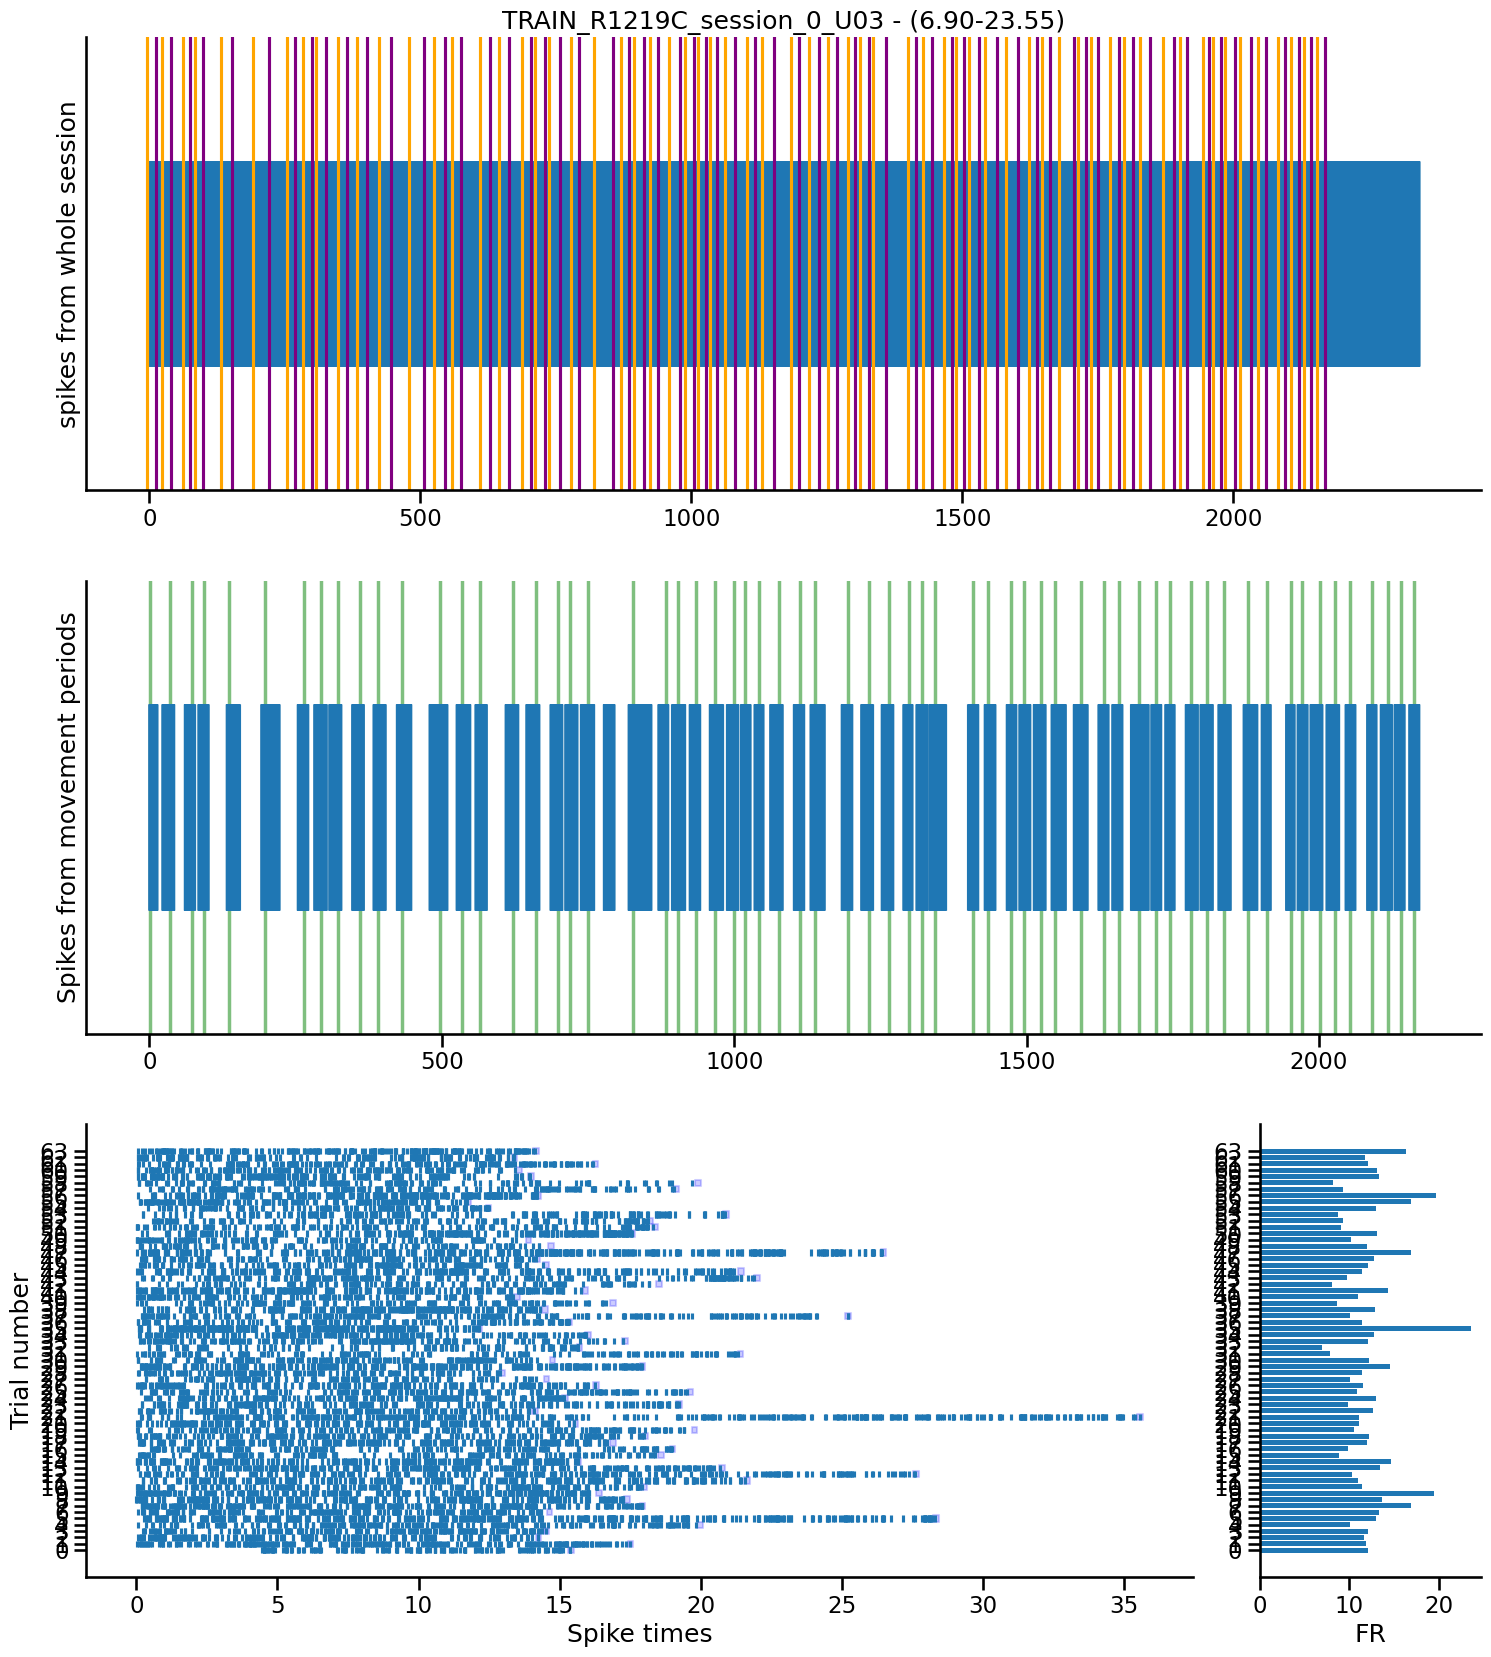

In [17]:
# Plot the unit report for one example unit 
plot_spikes_trial(spikes, spikes_trial, movement_spikes_all, movement_start, movement_end, 
                  movement_stops_trial, response_time, frs, name, hlines)